In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

1.0011865297009068


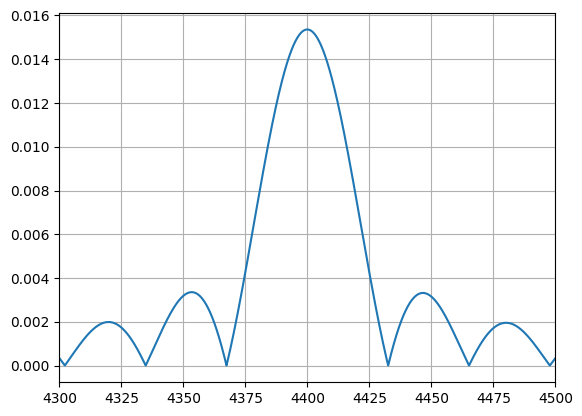

In [4]:
F = 4400

f = np.arange(F - 100, F + 100, 0.1)

M = 15

omega = 2 * np.pi * f

P_dbm = 27

P = 10 ** (P_dbm / 10) * 1e-3

A = np.sqrt(2 * P)

A_c = A

print(A_c)

w_c = 2 * np.pi * F

T_b = M / F

b = lambda n: -1

t = lambda n: (2 * n + 1) * T_b / 2

X_b = lambda omega, N: T_b * np.array([
   np.sum([
         b(n) * np.sinc(w * T_b / (2 * np.pi)) * np.exp(-1j * w * t(n)) for n in range(1, N)
      ]) for w in omega
   ])

X_m = A_c * 1/2 * 1j * (X_b(omega + w_c, 10) - X_b(omega - w_c, 10))

fig, ax = plt.subplots()

ax.plot(f, np.abs(X_m))
ax.grid()
ax.set_xlim([F - 100, F + 100])

fig.savefig('mod-demod.png')



# Svar på frågorna
## 1
**1a**

Blir för svårt i md, finns i anteckningar på papper

**1b**

$w_c = 2\pi f $, 1.4 mRad /s

$M = 15$ (hittade genom att testa sig fram)

$f \in [4300,4500] $

$T_b = \frac{M}{f} = \frac{15}{4400}$ = 3.41 ms

**1c**

$P = 10^{\frac{{P_{dBm}}}{10}} = 10^{\frac{2.7}{10}\cdot 10^{-3} = 501$

$P_{dBm}$ = 27 dBm

$P = \frac{A^2}{2}$

$ A = \sqrt{2P} = \sqrt{1002} \approx 31$ 

Tradeoff mellan performance och bitrate

Ju större $T_b$, desto lägre bitrate. När vi höjer M, dvs vill ha bättre performance så höjs $T_b$ enligt deras förhållande, $T_b = \frac{M}{f}$.*

**1d**

$y_I = A_r x_b(r-t_0)sin(w_ct)cos()